## 인스타 그램 크롤링 : 핫한 회기 맛집 ,카페


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 예제 5-1 chromedriver 열기
from selenium import webdriver

driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/69865118.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


* 크롤링 수행

In [6]:
# 인스타그램 접속하기
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')
time.sleep(2)

In [7]:
# 인스타 검색결과 
def insta_searching(word):
    
    url = 'https://www.instagram.com/explore/tags/' + word # 인스타 검색시 주소 형식
    return url    

In [21]:
word = '경희대맛집'
url = insta_searching(word)
driver.get(url)

* 첫번째 게시물 열기 

In [22]:
# 함수로 구현 
def select_first(driver) :
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)  # 3초간 대기 

In [24]:
select_first(driver)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


* 게시물 정보 가져오기 
: 본문 내용 :( < div class = "MOdxS" > span)[0]     

  해시태그 :( 본문 내에서 # )    
  
  작성일 :( < time class="_1o9PC Nzb55" datetime="2022-02-18T03:08:24.000Z" title="2022년 2월 18일">4시간 전 < /time >    
  
  위치정보 :( < div class="M30cS" >)   
  
  좋아요 수 :( < div class="_7UhW9   xLCgt        qyrsm KV-D4              fDxYl    T0kll ">좋아요 < span >1,409< /span>개< /div> )

In [25]:
from bs4 import BeautifulSoup
import unicodedata

In [26]:
# 게시물 정보를 가져오는 함수 
import re  # re : 정규표현식

def get_content(driver) : 
    # 현재 페이지 html 소스 가져오기 
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser') # html 형식
    
    # 본문 내용 가져오기 
    try:
        content = soup.select('div.MOdxS > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
        
    # 본문 내 해시태그 
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 작성일자 
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10] #년-월-일
    
    # 좋아요 수 
    try : 
        like = soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll >span')[0].text
    except :
        like = 0
    
    # 위치정보 
    try : 
        place = soup.select('div.M30cS')[0].text
    except :
        place = ''

    # 수집한 정보 저장
    data = [content, date, like, place , tags]
    return data
        

In [27]:
get_content(driver)

['신당동 최고 맛집!!\u2063\u2063🧡신당동 찐 맛집 "청춘상회"🐖🥩\u2063\u2063냉삼의 추억을 제~대로 느끼게 해준 청춘상회!\u2063그냥 삼겹살도 맛있지만 냉삼의 매력을 알게되는\u2063순간부터 절대 못 빠져나온다구~~🤤🤤\u2063\u2063레트로 감성에 맛이 두 배가 되는 느낌 크~🥴\u2063맛은 물론이고 가성비까지 좋다니,,,!!!\u2063감동의 쓰나미 ㅜㅜㅜㅜㅜ🌊\u2063\u2063고기먹고 볶음밥 필수! 📌다들 국룰인거 알죵??\u2063신당동하면 청춘상회! 기억하기 약속🤙🏻\u2063오늘의 메뉴는 냉삼이다!\u2063지금 바로 청춘상회로 go go~~!🚀🚀\u2063\u2063\u2063•••••••••••information•••••••••••\u2063\u2063🏠 청춘상회 🏠\u2063⏰ 영업시간 : 16:00~09:00\u2063☎ 매장 번호 : 02-2231-3002\u2063🛣 찾아오시는 길: 서울특별시 중구 다산로 232\u2063*주차 가능\u2063\u2063#신당동맛집 #동대문맛집추천 #청량리맛집 #휘경동맛집 #이문동맛집\u2063#외대맛집 #신당역맛집 #회기맛집추천 #경희대맛집',
 '2022-02-05',
 0,
 '',
 ['#신당동맛집',
  '#동대문맛집추천',
  '#청량리맛집',
  '#휘경동맛집',
  '#이문동맛집\u2063',
  '#외대맛집',
  '#신당역맛집',
  '#회기맛집추천',
  '#경희대맛집']]

* 다음 게시물 열기 : 우측 버튼 클릭  (div class l8mY4.feth3)


In [28]:
def move_next(driver):

    right = driver.find_element_by_css_selector('div.l8mY4.feth3')
    right.click()
    time.sleep(3)

In [30]:
move_next(driver)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


### 여러 게시글 정보를 수집
1. 크롬 브라우저 열기 
2. 인스타 그램 검색 페이지 url 만들기
3. 검색 페이지 접속  
4. 첫번째 게시물 클릭 
5. result [] 만들기 
6. 게시물 정보 수집하기 
7. 게시물 results에 추가하기 
8. 다음 게시물 선택 
9. 완료 (target) 횟수 지정

* 함수로 구현

In [31]:
from selenium import webdriver 
from bs4 import BeautifulSoup
import time 
import re

In [32]:
#① 크롬 브라우저 열기
driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('https://www.instargram.com')
time.sleep(2)
# 로그인 직접

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/1277785024.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


In [35]:
word = "경희대맛집"    #검색어
url = insta_searching(word)
time.sleep(3)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [36]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 100     # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기 함수 사용 
        results.append(data)          # result 리스트에 추가 
        move_next(driver)             # 다음게시물로
    except:
        time.sleep(2)                 # content가 없음.
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [37]:
# 결과확인
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head()

,content,date,like,place,tags
0,"신당동 최고 맛집!!⁣⁣🧡신당동 찐 맛집 ""청춘상회""🐖🥩⁣⁣냉삼의 추억을 제~대로 ...",2022-02-05,0,,"[#신당동맛집, #동대문맛집추천, #청량리맛집, #휘경동맛집, #이문동맛집⁣, #외..."
1,( 협찬 )회기 삼겹살 맛집은 어디~형~고깃집!!!!!고기종류도 여러가지! 찌개종류...,2022-02-20,116,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."
2,회기동 #시키카츠경희대생들이 사랑하는 카츠 전문점시키카츠를 친구가 밥 사준다길래 다...,2022-01-27,574,"경희대학교 Kyung Hee Univ, South Korea","[#시키카츠경희대생들이, #회기맛집, #아가리회기]"
3,단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥) 형~고깃...,2022-02-18,117,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."
4,다시오자 우리♡#호랭이양식당 #회기맛집....#경희대맛집#회기역맛집#회기파스타#경희...,2022-02-03,117,,"[#호랭이양식당, #회기맛집...., #경희대맛집, #회기역맛집, #회기파스타, #..."


In [38]:
# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food.xlsx')

* 키워드 : 경희대 카페

In [41]:
word = "경희대카페"    #검색어
url = insta_searching(word)
time.sleep(5)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [42]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 100     # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [43]:
# 결과확인
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head()

,content,date,like,place,tags
0,Big hand..,2022-02-18,357,Ourwave,[]
1,"1월의 딸기를 이용한 쁘띠갸또, 샹그리아딸기타르트.어느 제품과도 잘 어울리는 무한 ...",2022-01-05,519,,"[#샹그리아딸기타르트, #1월의케이크, #딸기타르트, #strawberrytart]"
2,🌟내 가게 노출과 방문을 늘리는 비결은 업스타그램🌟업계 1위의 비결 빅데이터!신뢰도...,2022-02-17,258,,"[#성남카페, #양양카페, #경희대카페, #상수동카페, #구로카페, #증평카페, #..."
3,판나코타🤍진짜 한입거리얌#푸딩 #판나코타 #회기 #컴투레스트 #회기카페 #경희대카페,2022-02-19,150,컴투레스트,"[#푸딩, #판나코타, #회기, #컴투레스트, #회기카페, #경희대카페]"
4,주말에 좋아하는 카페 가는게 힐링 아니겠냐 이말이다!!,2022-01-29,497,오앤디,[]


In [44]:

# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_cafe.xlsx')

* 키워드 : 회기맛집

In [58]:
word = "회기맛집"    #검색어
url = insta_searching(word)
time.sleep(5)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [59]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 100     # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [60]:
# 결과확인
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head()

,content,date,like,place,tags
0,( 협찬 )단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥...,2022-02-10,116,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."
1,경희대 숯불 닭갈비 끝판왕 맛집 🔥🔥📌 동대문구 회기동 60-65 #팔각도경희대점한...,2022-02-16,0,,"[#팔각도경희대점한상차림, #경희대맛집, #회기맛집, #청량리맛집, #고대맛집, #..."
2,회기동 #시키카츠경희대생들이 사랑하는 카츠 전문점시키카츠를 친구가 밥 사준다길래 다...,2022-01-27,574,"경희대학교 Kyung Hee Univ, South Korea","[#시키카츠경희대생들이, #회기맛집, #아가리회기]"
3,단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥) 형~고깃...,2022-02-17,119,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."
4,단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥) 형~고깃...,2022-02-18,117,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."


In [62]:
# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food2.xlsx')

* 키워드 : 회기역맛집

In [49]:
word = "회기역맛집"    #검색어
url = insta_searching(word)
time.sleep(5)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [50]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 100     # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_2252/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [51]:
# 결과확인
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head()

,content,date,like,place,tags
0,인〰️생〰️은〰️새옹지마,2022-02-18,180,Mtl Hanmam,[]
1,단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥) 형~고깃...,2022-02-19,119,,"[#회기맛집, #회기술집, #회기가볼만한곳, #회기데이트, #회기역맛집, #회기고기..."
2,저렴하지만 가성비좋은 #거복이식당#회기맛집#경희대맛집#회기역맛집#회기고기집#회기삼겹...,2022-02-19,151,회기동,"[#거복이식당, #회기맛집, #경희대맛집, #회기역맛집, #회기고기집, #회기삼겹살..."
3,회기에서 데이튜#호랭이양식당 분위기좋아....#회기맛집#고대술집#회기역맛집#시립대술...,2022-02-19,134,호랭이양식당,"[#호랭이양식당, #회기맛집, #고대술집, #회기역맛집, #시립대술집, #경희대파스..."
4,기념일ღ고마워❤❤❤#호랭이양식당...#경희대파스타#회기역맛집#경희대맛집#회기파스타#...,2022-02-18,111,호랭이양식당,"[#호랭이양식당..., #경희대파스타, #회기역맛집, #경희대맛집, #회기파스타, ..."


In [55]:
# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food3.xlsx')

###  여러 엑셀 파일 중복 제거 후 통합저장 

In [64]:
#여러 개의 저장파일 통합하기
khu_insta_df = pd.DataFrame( [ ] )

folder = 'C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/'
f_list = ['khu_food.xlsx', 'khu_food2.xlsx','khu_food3.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    khu_insta_df = khu_insta_df.append(temp)

khu_insta_df.columns =['index','content','date','like','place','tags']


In [66]:
# 중복제거
khu_insta_df.drop_duplicates(subset = ["content"] , inplace = True)
khu_insta_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_crawling_raw.xlsx', index = False)

### 워드 클라우드

In [67]:
import pandas as pd 
raw_total = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#신당동맛집', '#동대문맛집추천', '#청량리맛집', '#휘경동맛집', '#이...
1    ['#회기맛집', '#회기술집', '#회기가볼만한곳', '#회기데이트', '#회기역...
2                   ['#시키카츠경희대생들이', '#회기맛집', '#아가리회기']
Name: tags, dtype: object

In [68]:
# 해시태그를 통합 저장 
# 딕 - A: n회 , B : n회 ... 
tags_total = []

for tags in raw_total['tags'] :
    print(tags)
    tags_list = tags[2 :-2].split("', '")   # tags 내용 형식 [ '#~'  ~'#태그 ' ]
    for tag in tags_list :
        tags_total.append(tag)              # tags_total 리스트에 추가 
        

['#신당동맛집', '#동대문맛집추천', '#청량리맛집', '#휘경동맛집', '#이문동맛집\u2063', '#외대맛집', '#신당역맛집', '#회기맛집추천', '#경희대맛집']
['#회기맛집', '#회기술집', '#회기가볼만한곳', '#회기데이트', '#회기역맛집', '#회기고기집', '#회기역술집', '#경희대맛집', '#삼겹살맛집']
['#시키카츠경희대생들이', '#회기맛집', '#아가리회기']
['#회기맛집', '#회기술집', '#회기가볼만한곳', '#회기데이트', '#회기역맛집', '#회기고기집', '#회기역술집', '#경희대맛집', '#삼겹살맛집']
['#호랭이양식당', '#회기맛집....', '#경희대맛집', '#회기역맛집', '#회기파스타', '#경희대파스타', '#회기맛집호랭이양식당', '#고대맛집', '#외대파스타', '#청량리파스타', '#청량리맛집', '#동대문구맛집', '#안암맛집']
['#팔각도경희대점한상차림', '#경희대맛집', '#경희대카페', '#회기맛집', '#회기카페', '#청량리맛집', '#청량리카페', '#외대맛집', '#외대카페', '#고대맛집', '#고대카페', '#신당동맛집', '#휘경동맛집', '#이문동맛집', '#외대맛집']
['#회기맛집', '#거복이식당....', '#회기고깃집', '#경희대고기집', '#경희대맛집', '#경희대맛집거복이식당', '#회기역맛집', '#회기고기집', '#회기삼겹살', '#경희대고깃집', '#경희대삼겹살']
['#거복이식당고기도', '#회기고깃집', '#경희대고기집', '#회기맛집', '#경희대맛집', '#경희대맛집거복이식당', '#회기역맛집', '#회기고기집', '#회기삼겹살', '#경희대고깃집', '#경희대삼겹살']
['#회기파스타', '#경희대파스타', '#고대양식', '#시립대양식', '#외대양식', '#청량리술집', '#회기맛집', '#경희대맛집', '#회기맛집호랭이양식당', '#회기역맛집', '#동대문구술집', '#안암양식', '#회기역양식']
['#경희대맛집', '#회기삼

In [69]:
tags_list

['#스시', '#히노하루', '#스시히노하루', '#오마카세', '#런치오마카세', '#동대문구맛집', '#회기역맛집', '#경희대맛집']

In [70]:
tag

'#경희대맛집'

In [71]:
len(tags_total)

1299

* 해시태그 출현 빈도 집계 : Counter 함수 

In [72]:
from collections import Counter 
tags_counts = Counter(tags_total)

In [77]:
tags_counts.most_common(50)

[('#회기맛집', 73),
 ('#회기역맛집', 55),
 ('#경희대맛집', 52),
 ('', 24),
 ('#회기파스타', 23),
 ('#경희대파스타', 22),
 ('#회기맛집호랭이양식당', 22),
 ('#회기고기집', 20),
 ('#경희대맛집거복이식당', 16),
 ('#외대맛집', 15),
 ('#청량리맛집', 14),
 ('#회기역술집', 14),
 ('#회기술집', 12),
 ('#회기삼겹살', 12),
 ('#고대맛집', 11),
 ('#시립대맛집', 11),
 ('#회기데이트', 8),
 ('#삼겹살맛집', 8),
 ('#동대문구맛집', 8),
 ('#회기카페', 8),
 ('#고대양식', 6),
 ('#시립대양식', 6),
 ('#외대양식', 6),
 ('#청량리술집', 6),
 ('#동대문구술집', 6),
 ('#안암양식', 6),
 ('#회기역양식', 6),
 ('#거복이식당', 6),
 ('#회기동맛집', 6),
 ('#고대술집', 6),
 ('#시립대술집', 6),
 ('#청량리양식', 6),
 ('#동대문구양식', 6),
 ('#외대술집', 6),
 ('#안암술집', 6),
 ('#외대파스타', 5),
 ('#청량리파스타', 5),
 ('#안암맛집', 5),
 ('#경희대카페', 5),
 ('#외대카페', 5),
 ('#경희대술집', 5),
 ('#고대파스타', 5),
 ('#시립대파스타', 5),
 ('#동대문구파스타', 5),
 ('#안암파스타', 5),
 ('#회기역파스타', 5),
 ('#동대문맛집', 5),
 ('#회기', 5),
 ('#호랭이양식당....', 5),
 ('#휘경동맛집', 4)]

: 가장 많은 키워드는 회기맛집

In [78]:
most_common = tags_counts.most_common(50)

* 막대차트로 해시태그 살펴보기 

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager , rc # 한폰트 깨짐
import sys 

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [79]:
tag_counts_df = pd.DataFrame(most_common)
tag_counts_df.columns = ['tags', 'counts']

In [81]:
tag_counts_df.head()

,tags,counts
0,#회기맛집,73
1,#회기역맛집,55
2,#경희대맛집,52
3,,24
4,#회기파스타,23


<AxesSubplot:xlabel='counts', ylabel='tags'>

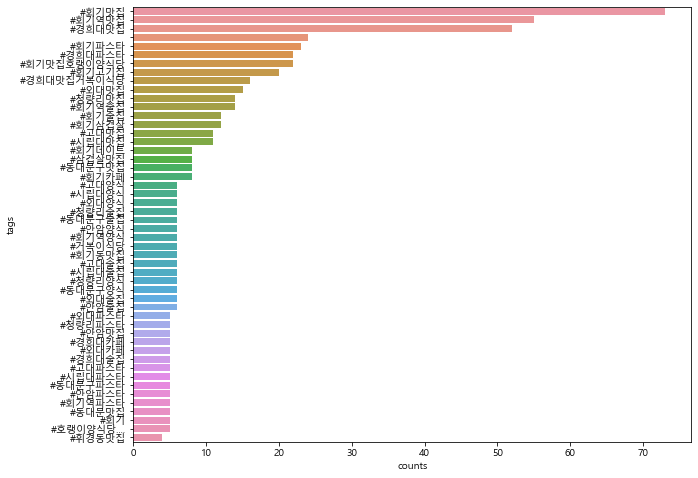

In [83]:
plt.figure(figsize= (10,8))
sns.barplot(data = tag_counts_df , x= 'counts', y ='tags')


* 워드 클라우드 그리기 

In [84]:
from wordcloud import WordCloud
   # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

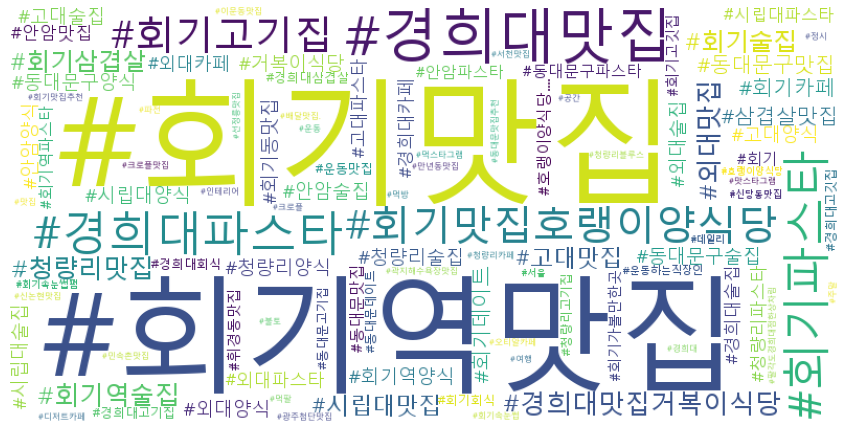

In [90]:
# 워드 클라우드 생성 
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words = 100 , 
                    relative_scaling = 0.3,
                    width = 800,
                    height = 400).generate_from_frequencies(tags_counts)
                    # .generate_from_frequecies(표현할 데이터)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food_wordcloud.png')

## 지도 시각화 folium

In [91]:
import pandas as pd 
raw_total = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_crawling_raw.xlsx')
raw_total.head()

,index,content,date,like,place,tags
0,0,"신당동 최고 맛집!!⁣⁣🧡신당동 찐 맛집 ""청춘상회""🐖🥩⁣⁣냉삼의 추억을 제~대로 ...",2022-02-05,0,NaN,"['#신당동맛집', '#동대문맛집추천', '#청량리맛집', '#휘경동맛집', '#이..."
1,1,( 협찬 )회기 삼겹살 맛집은 어디~형~고깃집!!!!!고기종류도 여러가지! 찌개종류...,2022-02-20,116,NaN,"['#회기맛집', '#회기술집', '#회기가볼만한곳', '#회기데이트', '#회기역..."
2,2,회기동 #시키카츠경희대생들이 사랑하는 카츠 전문점시키카츠를 친구가 밥 사준다길래 다...,2022-01-27,574,"경희대학교 Kyung Hee Univ, South Korea","['#시키카츠경희대생들이', '#회기맛집', '#아가리회기']"
3,3,단골집 목록중에 하나 쓰-윽 소개해줄라니까모여봐요!!..!!!!(속닥속닥) 형~고깃...,2022-02-18,117,NaN,"['#회기맛집', '#회기술집', '#회기가볼만한곳', '#회기데이트', '#회기역..."
4,4,다시오자 우리♡#호랭이양식당 #회기맛집....#경희대맛집#회기역맛집#회기파스타#경희...,2022-02-03,117,NaN,"['#호랭이양식당', '#회기맛집....', '#경희대맛집', '#회기역맛집', '..."


In [92]:
# place 위치 정보 
location_counts = raw_total['place'].value_counts()
location_counts

호랭이양식당                               10
회기동                                   4
서울시립대로 27길40                          3
서울                                    3
OTR                                   2
회기역                                   2
플렉스빌                                  2
청량리블루스                                2
크치치킨 회기점                              2
경희대앞                                  2
팔청식당영통점                               2
Mtl Hanmam                            1
청량리동                                  1
메이크픽스짐_makefixgym                     1
Ond.                                  1
카페양귀비                                 1
경희대학교 Kyung Hee Univ, South Korea     1
헤이즐넛버터                                1
굿갓                                    1
청화월                                   1
광교 바나나테이블                             1
비스트로 출출 Bistro chulchul               1
울산성남동                                 1
경기도 수원시                               1
법조타운사거리                               1


In [93]:
# df로 변환 
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
호랭이양식당,10
회기동,4
서울시립대로 27길40,3
서울,3
OTR,2


In [94]:
locations = list(location_counts.index)
locations

['호랭이양식당',
 '회기동',
 '서울시립대로 27길40',
 '서울',
 'OTR',
 '회기역',
 '플렉스빌',
 '청량리블루스',
 '크치치킨 회기점',
 '경희대앞',
 '팔청식당영통점',
 'Mtl Hanmam',
 '청량리동',
 '메이크픽스짐_makefixgym',
 'Ond.',
 '카페양귀비',
 '경희대학교 Kyung Hee Univ, South Korea',
 '헤이즐넛버터',
 '굿갓',
 '청화월',
 '광교 바나나테이블',
 '비스트로 출출 Bistro chulchul',
 '울산성남동',
 '경기도 수원시',
 '법조타운사거리',
 '히노하루']

* 카카오 검색 API 사용 

In [97]:
# 예제 5-30 카카오 로컬 API를 활용한 장소 검색 함수 만들기
import requests
def find_places(searching):
    # ① 접속URL 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    # ② headers 입력하기
    headers = {
    "Authorization": "KakaoAK 6792a64da2e7c58ad57d5b7fb306b326" # kakao API
    }
    # ③ API 요청&정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    # ④ 필요한 정보 선택하기
    place = places[0] 
    name = place['place_name']
    x=place['x'] # 경도
    y=place['y'] # 위도 
    data = [name, x, y, searching] 
    
    return data

* 경희대의 위치정보 

In [99]:
data = find_places('경희대학교')
data

['경희대학교 서울캠퍼스', '127.05285401582', '37.5968011678013', '경희대학교']

* 경희대 맛집 인스타 결과에 대한 위치정보 : location_infrom 리스트

In [101]:
import time

location_inform = []
for location in locations :
    try :
        data = find_places(location)
        location_inform.append(data) # 이중리스트 ? 
        time.sleep(0.5)
    except: 
        pass 
location_inform

[['호랭이양식당', '127.051225032878', '37.5925492059187', '호랭이양식당'],
 ['경희대학교 서울캠퍼스', '127.05285401582', '37.5968011678013', '회기동'],
 ['식생원 시립대본점', '127.05255538684749', '37.58436580720609', '서울시립대로 27길40'],
 ['북한산둘레길 구름정원길8구간', '126.93626843562683', '37.62612118319853', '서울'],
 ['otrcoffee', '126.91328823546', '37.5969757637819', 'OTR'],
 ['회기역 1호선', '127.058048369273', '37.5897962196601', '회기역'],
 ['플렉스빌', '127.053153839572', '37.5916716879211', '플렉스빌'],
 ['청량리블루스', '127.05483706185', '37.5832997953294', '청량리블루스'],
 ['크치치킨 경희대점', '127.050590311081', '37.5916088440804', '크치치킨 회기점'],
 ['경희대기숙사앞교차로', '127.081373958658', '37.2484262760478', '경희대앞'],
 ['팔청식당', '127.04950517713777', '37.26326424861792', '팔청식당영통점'],
 ['홍릉시험림', '127.04485106092139', '37.59396455518687', '청량리동'],
 ['OND커피', '129.45672569493271', '35.585531885001686', 'Ond.'],
 ['카페양귀비', '127.05748918359', '37.5929319456092', '카페양귀비'],
 ['헤이즐넛버터', '127.05096475131941', '37.59276375465423', '헤이즐넛버터'],
 ['굿갓레스토랑', '127.04863615625715'

In [103]:
# 위치정보 df로 저장 
location_inform_df =pd.DataFrame(location_inform,
                                columns = ['카카오 위치명', '경도','위도','검색명'])
# 맛집 위치정보 리스트를 엑셀파일로
location_inform_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food_location.xlsx' , index =False)

* 맛집 위치정보 df : location_inform_df

In [104]:
location_inform_df = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food_location.xlsx')
location_inform_df.head()

,카카오 위치명,경도,위도,검색명
0,호랭이양식당,127.051225,37.592549,호랭이양식당
1,경희대학교 서울캠퍼스,127.052854,37.596801,회기동
2,식생원 시립대본점,127.052555,37.584366,서울시립대로 27길40
3,북한산둘레길 구름정원길8구간,126.936268,37.626121,서울
4,otrcoffee,126.913288,37.596976,OTR


* location_counts_df : 위치정보의 태그 수  

In [105]:
location_counts_df.head()

,place
호랭이양식당,10
회기동,4
서울시립대로 27길40,3
서울,3
OTR,2


* 위치정보df 와 해시태그 횟수 df 를 합침 : 기준열 - 검색명   
: how = 'inner'  교집합만 , left_on = 왼쪽 inform_df의 '검색명'을 기준키로 

In [106]:
location_data = pd.merge(location_inform_df, location_counts_df , 
                         left_on = '검색명', how ='inner', right_index = True)
location_data.head()

,카카오 위치명,경도,위도,검색명,place
0,호랭이양식당,127.051225,37.592549,호랭이양식당,10
1,경희대학교 서울캠퍼스,127.052854,37.596801,회기동,4
2,식생원 시립대본점,127.052555,37.584366,서울시립대로 27길40,3
3,북한산둘레길 구름정원길8구간,126.936268,37.626121,서울,3
4,otrcoffee,126.913288,37.596976,OTR,2


In [107]:
# 엑셀로 저장 : khu_food_location_inform
location_data.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food_location_inform.xlsx', index = False)


### Folium 지도 시각화 

In [109]:
location_data = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/khu_food_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   카카오 위치명  22 non-null     object 
 1   경도       22 non-null     float64
 2   위도       22 non-null     float64
 3   검색명      22 non-null     object 
 4   place    22 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1008.0+ bytes


In [119]:
import folium
# 지도 호출 
Khu_univ =[37.596801, 127.052854] # 6자리만 위도 , 경도
map_khu = folium.Map(location = Khu_univ, zoom_start = 13) # 지도데이터

for i in range(len(location_data)):
    name = location_data ['카카오 위치명'][i]    # 공식명칭
    count = location_data ['place'][i]           # 게시글 개수
    size = int(count)*2 
    long = float(location_data['위도'][i])      #위도
    lat = float(location_data['경도'][i])       # 경도
    
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_khu)
    
map_khu


* 그룹으로 표시 (서클 마커 집합)

In [120]:
# 맛집 정보들을 리스트에 넣기 
from folium.plugins import MarkerCluster 
locations = [] 
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i] #  한 레코드 씩 
    locations.append((float(data['위도']),float(data['경도']))) # 리스트에 맛집 별 위도,경도 튜플로 추가 
    names.append(data['검색명'])


In [121]:
locations[:5]

[(37.5925492059187, 127.051225032878),
 (37.5968011678013, 127.05285401582),
 (37.58436580720609, 127.0525553868475),
 (37.62612118319853, 126.9362684356268),
 (37.5969757637819, 126.91328823546)]

In [122]:
names[:5]

['호랭이양식당', '회기동', '서울시립대로 27길40', '서울', 'OTR']

In [125]:
icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html : '<b>' + cluster.getChildCount() + '</b>',
    className : 'marker-cluster marker-cluster-large',
    iconsize : new L.Point(30,30)
    }); 
}"""

Khu_univ =[37.596801, 127.052854] # 6자리만 위도 , 경도
map_khu2 = folium.Map(location = Khu_univ, zoom_start = 13) # 지도데이터

marker_cluster = MarkerCluster(
    locations = locations , popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function)

marker_cluster.add_to(map_khu2)
folium.LayerControl().add_to(map_khu2)

map_khu2